In [15]:
import re
log_path = 'G:\code\python\CryptoQuantized\log\log.txt'
f = open(log_path)
arr = []
buy_losses = []
sell_losses = []
earns = []

is_sell = False
lines = 0
for line in open (log_path):
    lines += 1
    if "BUY, price" in line:
        buy_losses.append(float(re.search(r'loss = (.*)%', line)[1]))
    if "SELL, price" in line:
        sell_losses.append(float(re.search(r'loss = (.*)%', line)[1]))
        is_sell = True
    elif "Earn" in line:
        if is_sell:
            is_sell = False
            earns.append(float(re.search(r'Earn rate without fee: (.*)%', line)[1]))
        else:
            print(lines)

201
583
6813


In [17]:
import numpy as np
print(f"Total buy nums: {len(buy_losses)}")
print(f"Total buy_losses: {np.sum(buy_losses) :.5f} %")
print(f"Average buy_losses: {np.mean(buy_losses) :.6f} %")
print(f"Max buy_losses: {np.max(buy_losses) :.5f} %")
print(f"Median buy_losses: {np.median(buy_losses) :.5f} %")
print()
print(f"Total sell nums: {len(sell_losses)}")
print(f"Total sell_losses: {np.sum(sell_losses) :.5f} %")
print(f"Average sell_losses: {np.mean(sell_losses) :.6f} %")
print(f"Max sell_losses: {np.max(sell_losses) :.5f} %")
print(f"Median sell_losses: {np.median(sell_losses) :.5f} %")
print()
print(f"Total earn nums: {len(earns)}")
print(f"Total earns: {np.sum(earns) :.5f} %")
print(f"Average earns: {np.mean(earns) :.6f} %")
print(f"Max earns: {np.max(earns) :.5f} %")
print(f"Min earns: {np.min(earns) :.5f} %")
print(f"Median earns: {np.median(earns) :.5f} %")

Total buy nums: 393
Total buy_losses: 0.70100 %
Average buy_losses: 0.001784 %
Max buy_losses: 0.01200 %
Median buy_losses: 0.00100 %

Total sell nums: 392
Total sell_losses: 0.00000 %
Average sell_losses: 0.000000 %
Max sell_losses: 0.00000 %
Median sell_losses: 0.00000 %

Total earn nums: 392
Total earns: 0.52400 %
Average earns: 0.001337 %
Max earns: 0.60800 %
Min earns: -0.16500 %
Median earns: -0.00350 %


In [19]:
from analysis_utils import *

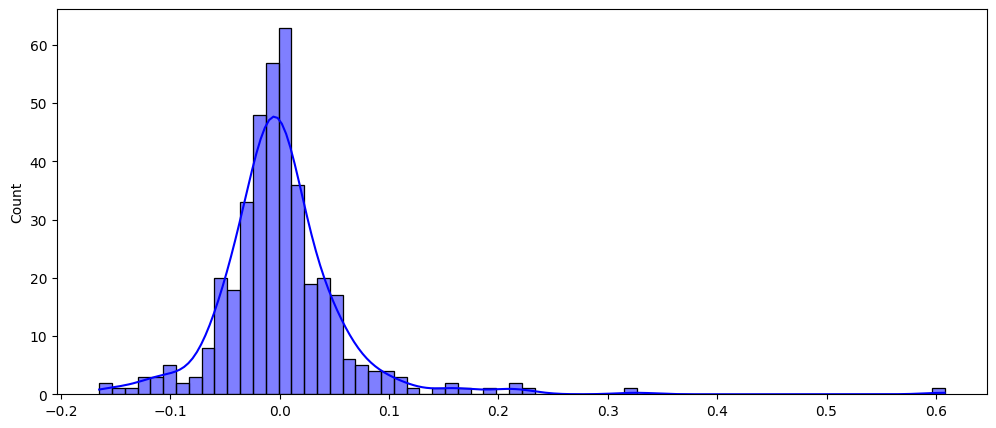

In [20]:
histplot(earns)

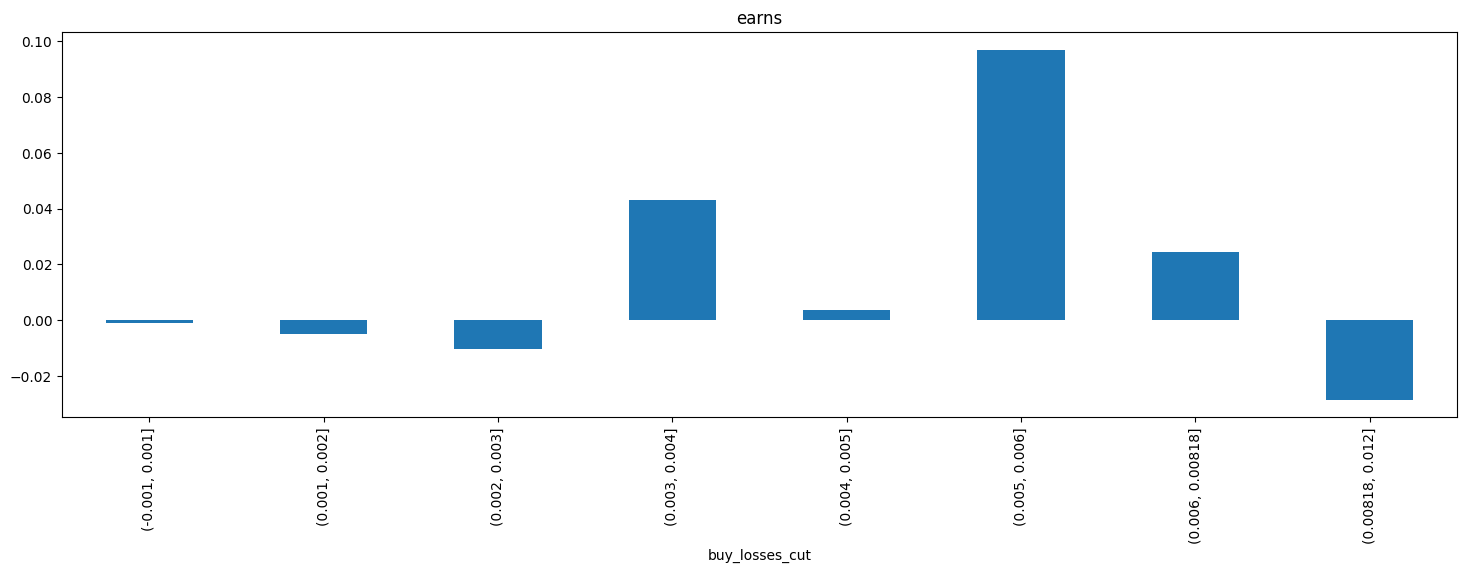

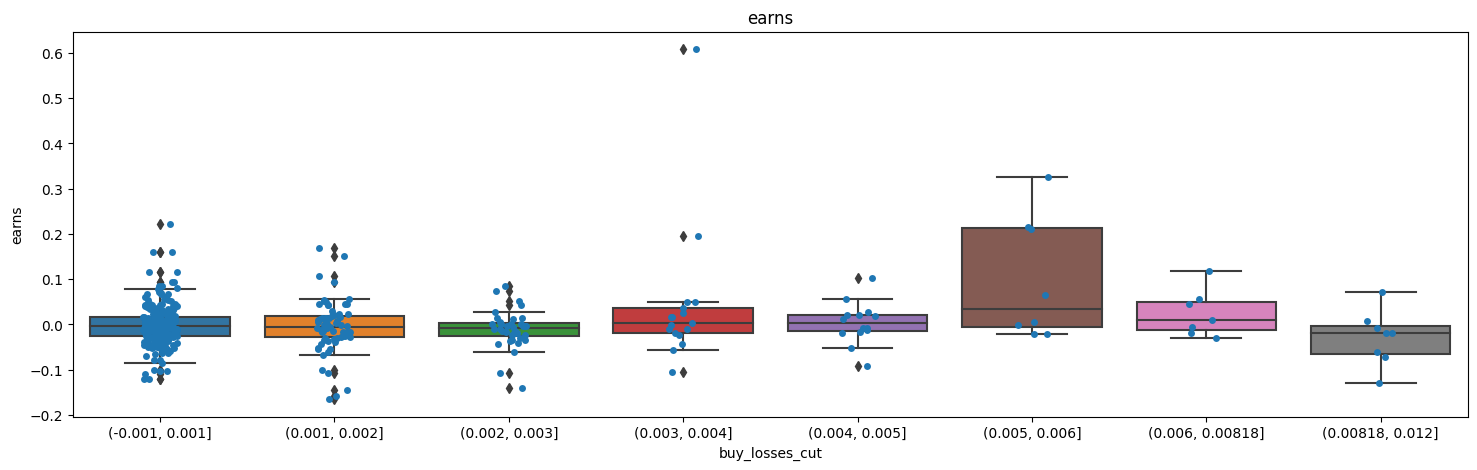

In [22]:
import pandas as pd
data = pd.DataFrame({'buy_losses': buy_losses[:len(sell_losses)], 'sell_losses': sell_losses, 'earns': earns})
plt_A_B(data, 'buy_losses', 'earns', cut_num=10)
plt_box_A_B(data, 'buy_losses', 'earns', cut_num=10)

In [24]:
data[data['buy_losses'] > 0.008]

,buy_losses,sell_losses,earns
21,0.010,0.0,0.008
27,0.010,0.0,-0.062
91,0.010,0.0,-0.018
201,0.009,0.0,-0.072
223,0.010,0.0,-0.129
339,0.010,0.0,0.071
355,0.009,0.0,-0.007
371,0.012,0.0,-0.019
